#  MACHINE LEARNING WITH SCIKIT-LEARN 


# Partie I : régressions linéaires et polynomiales

Dans cet article nous allons réaliser quelques opérations de base en Python et Scikit-Learn.
L'objectif sera d'apprendre des modèles de régression linéaires et polynomiales, de les représenter et de calculer leurs performances en terme d'erreur quadratique moyenne.

Nous apprendrons pour cela à manipuler les classes **LinearRegresion** et **PolynomialFeatures** de Scikit-Learn.

Cet article sera également l'occasion de manipuler des fonctions de NumPy et MatPlotLib pour générer des nombres aléatoires et présenter les résultats sous la forme de figure.

### 1. Générer un vecteur $x$ contenant $n=10$ points répartis uniformément sur l'intervalle $[0,1]$.

Nous allons utilisé la fonction **random.uniform** du package *NumPy* qui permet de générer des nombres aléatoires selon une loi uniforme. Nous fixerons également la graine aléatoire qui nous permettra de retombe toujours sur les mêmes résultats à chaque exécution. À travers **np.random.seed(22)**

In [1]:
# standard imports
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# set random seed
np.random.seed(22)
# load dataset
n = 10
x = np.random.uniform(0,1,n)

 ### 2. Générer la variable  $y = 3x + 4 + \epsilon$ où $\epsilon$ est un bruit suivant une loi normale centrée sur 0 et d'écart type $\sigma = 0.5$. Tracer $y$ en fonction de $x$.
 
Toujours avec la fonction **random.normal** du package *NumPy* nous allons générer des nombres distribués normalement, c'est à dire avec **sigma = 0.5** et une moyenne = 0.

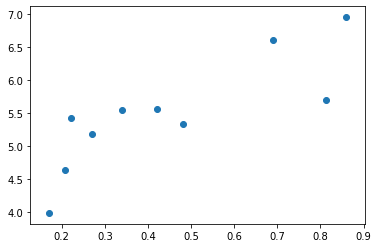

In [2]:
# generate noise
sigma = 0.5
noise = np.random.normal(0, sigma, n)
# generate y
a = 3
b = 4
y = a*x + b + noise
# plot
plt.scatter(x,y)
plt.show()

### 3. Effectuer une régression linéaire de $y$ en fonction de $x$ en utilisant la classe *LinearRegression* du package Scikit-Learn avec le code ci-dessous. Comparer les coefficients de pente et d'ordonnée à l'origine obtenus à leurs vraies valeurs.

La procédure pour construire un modèle avec scikit-learn consiste à :
    1. importer la classe correpondante qui est la fonction **LinearRegression**
    2. instancier le modèle
    3. appeler sa méthode **fit** en lui donnant comme argument  $x$ et $y$.

In [3]:
# NB : scikit-learn expects to have a 2D array as input, we need to reshape it 
x = x.reshape(-1,1)
# load class
from sklearn.linear_model import LinearRegression
# instanciate model
linReg = LinearRegression()
# learn model
linReg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
print('linear regression : slope = %f and intercept = %f' % (linReg.coef_,linReg.intercept_))
print('\t--> true values = %f and %f' % (a,b))

linear regression : slope = 2.743499 and intercept = 4.263733
	--> true values = 3.000000 and 4.000000


### 4. Génerer une figure représentant (1) le jeu de données, (2) la droite de régression obtenue et (3) la vraie droite $y = 3x+4$.

* On pourra pour cela : 
    1. générer une grille de valeur régulièrement  espacée entre 0 et 1 en utilisant la fonction **linspace** du module NumPy
    2. obtenir les prédictions en appelant la mérthode **predict** de l'objet *LinearRegression*
* (Une alternative pour l'étape 2 étant d'en extraire la pente et l'intercept et de calculer manuellement les prédictions)

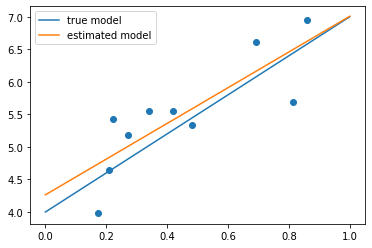

In [5]:
# generate x grid
x_grid = np.linspace(0,1,1000)
x_grid = np.reshape(x_grid,(-1,1))
# compute true values
y_grid = 3*x_grid + 4
# compute values predicted by the model
pred_grid = linReg.predict(x_grid)

# plot
plt.scatter(x,y)
plt.plot(x_grid, y_grid, label = 'true model')
plt.plot(x_grid, pred_grid, label = 'estimated model')
plt.legend()
plt.show()

 ###  5. Calculer l'erreur faite par le modèle sur les 10 points d'apprentissage ainsi que sur l'ensemble de l'intervalle $[0,1]$ selon le critère du "RMSE", la racine carrée de l'errreur quadratique moyenne : 
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^n \big(y_i - f(x_i)\big)^2  }   
$$
* RMSE = Root Mean Squared Error

In [6]:
pred = linReg.predict(x) 
rmse_train = np.sqrt(np.mean( (y-pred)**2  ))
rmse_test  = np.sqrt(np.mean( (y_grid-pred_grid)**2  ))
print('linear model : RMSE(train) = %f ;  RMSE(test) = %f' %(rmse_train,rmse_test))

linear model : RMSE(train) = 0.457627 ;  RMSE(test) = 1.182516


### 6. Réaliser la même analyse en considérant un modèle de régression polynomiale d'ordre $d \in \{2,3,5,9\}$ et comparer les erreurs obtenues (sur le vecteur d'apprentissage $x$ ainsi que sur l'ensemble de l'intervalle $[0,1]$).

* Pour réaliser une régression polynomiale on s'appuiera sur la classe **PolynomialFeatures** du module **preprocessing** de Scikit-Learn.
* La procédure consiste à : 
    1. transformer les données en utilisant la fonction **fit_transform** de l'objet **PolynomialFeatures**, ce qui a pour effet de réaliser l'expansion polynomiale.
    2. apprendre un modèle de régression linéaire, en utilisant la classe **LinearRegression**, à partir de la martrice obtenue (et du vecteur $y$).
* A noter que pour la prédiction, il faut également transformer les données **avant** d'appeler la mérthode **predict** de l'objet **LinearRegression**.

polynomial regression of oder 1 : RMSE(train) = 0.457627 ;  RMSE(test) = 1.182516
polynomial regression of oder 2 : RMSE(train) = 0.438813 ;  RMSE(test) = 1.217811
polynomial regression of oder 3 : RMSE(train) = 0.412333 ;  RMSE(test) = 1.542198
polynomial regression of oder 5 : RMSE(train) = 0.251887 ;  RMSE(test) = 6.889444
polynomial regression of oder 9 : RMSE(train) = 0.000000 ;  RMSE(test) = 2289.786912


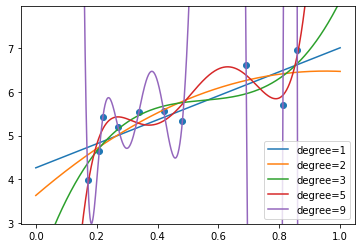

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# define list of degrees to consider
d_list = [1,2,3,5,9]

# show points
plt.scatter(x,y)

for i in range(len(d_list)):
    polyTransform = PolynomialFeatures(degree = d_list[i])
    x_poly =  polyTransform.fit_transform(x)
    linReg.fit(x_poly,y)
    pred = linReg.predict(x_poly) 
    x_grid_poly =  polyTransform.fit_transform(x_grid)
    pred_grid = linReg.predict(x_grid_poly)
    rmse_train = np.sqrt(np.mean( (y-pred)**2  ))
    rmse_test  = np.sqrt(np.mean( (y_grid-pred_grid)**2  ))
    print('polynomial regression of oder %d : RMSE(train) = %f ;  RMSE(test) = %f' %(d_list[i],rmse_train,rmse_test))
    # plot
    plt.plot(x_grid, pred_grid, label = 'degree={0}'.format(d_list[i]))

plt.ylim(min(y)-1, max(y)+1)
plt.legend()
plt.show()
